<a href="https://colab.research.google.com/github/Kaiziferr/deep_learning/blob/master/CNN/01_workshop_convolucionales_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [144]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import (
    Dense, Dropout, Flatten, Conv2D, MaxPooling2D
)
from keras.utils import to_categorical
import keras

from sklearn.metrics import classification_report

In [84]:
keras.utils.set_random_seed(73)

In [85]:
def optimization_learning_curves(
    history:dict,
    metrica:str,
    title:str='',
    X_size:int=8,
    y_size:int=4,
    font_size:int=15,
    X_label:str='Epoch',
    y_label:str='Loss'
)->None:
  """ Grafica curvas de aprendizaje """
  fig, ax = plt.subplots(figsize=(X_size, y_size))
  fig.suptitle(title, fontsize=font_size)
  ax.plot(history.history[metrica])
  ax.plot(history.history[f'val_{metrica}'])
  ax.set_xlabel(X_label, size = 12)
  ax.set_ylabel(y_label, size = 12)
  ax.legend(['Train', 'Test'], loc = 'upper right', fontsize = 12)
  ax.tick_params(labelsize = 12)
  fig.show()

# **Config**

---



In [128]:
pd.set_option('display.float_format', '{:,.15f}'.format)
random_seedd = 1235

# **Data**

In [86]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [87]:
X_train.shape

(60000, 28, 28)

In [88]:
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)).astype('float32')

In [89]:
X_test.shape

(10000, 28, 28, 1)

# **Normalization**

- Se toma como referente 255, ya que es el número de pixel normalmente. Donde cero es negro y 255 es blanco.

In [90]:
X_train = X_train/255
X_test = X_test/255

In [91]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [92]:
num_clases = y_test.shape[1]
num_clases

10

Arquitectura

1. Primera capa oculta: capa convolucional Conv2D

  - Tiene 32 mapas de caracteristicas, con un tamaño de $5*5$ y una función de activación ReLu
Capa Pooling MaxPooling2D

2. Tamaño de pacht de $2 * 2$
  -Capa de regularización Dropout
3. Capa Flatten para conversión de la matriz2D en un vector
4. Capa Dense con 128 neuronas y la función de activación ReLu
5. Capa de salida con 10 neuronas para las 10 clases y una función de activación Softmax
6. La compilación con ADAM, perdidad loogaritmica y accuracy

In [93]:
def model_base():
  model = Sequential()
  model.add(Conv2D(32, (5,5), input_shape=(28,28,1), activation='relu'))
  model.add(MaxPooling2D())
  model.add(Dropout(0.2))
  model.add(Flatten())
  model.add(Dense(128, activation='relu', kernel_initializer='glorot_uniform'))
  model.add(Dense(10, activation='softmax', kernel_initializer='glorot_uniform'))
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

In [94]:
y_train.shape[0]/200

300.0

300 lotes de 200 imagens

In [100]:
model = model_base()

In [101]:
history_base = model.fit(
    X_train,
    y_train,
    validation_data = (X_test, y_test),
    epochs = 15,
    batch_size = 200
)

Epoch 1/15
300/300 [==============================] - 2s 5ms/step - loss: 0.2298 - accuracy: 0.9342 - val_loss: 0.0758 - val_accuracy: 0.9770
Epoch 2/15
300/300 [==============================] - 1s 4ms/step - loss: 0.0675 - accuracy: 0.9799 - val_loss: 0.0484 - val_accuracy: 0.9851
Epoch 3/15
300/300 [==============================] - 1s 4ms/step - loss: 0.0478 - accuracy: 0.9851 - val_loss: 0.0375 - val_accuracy: 0.9871
Epoch 4/15
300/300 [==============================] - 1s 5ms/step - loss: 0.0381 - accuracy: 0.9885 - val_loss: 0.0367 - val_accuracy: 0.9877
Epoch 5/15
300/300 [==============================] - 2s 6ms/step - loss: 0.0309 - accuracy: 0.9900 - val_loss: 0.0310 - val_accuracy: 0.9893
Epoch 6/15
300/300 [==============================] - 1s 4ms/step - loss: 0.0261 - accuracy: 0.9920 - val_loss: 0.0320 - val_accuracy: 0.9885
Epoch 7/15
300/300 [==============================] - 1s 4ms/step - loss: 0.0210 - accuracy: 0.9933 - val_loss: 0.0337 - val_accuracy: 0.9889
Epoch 

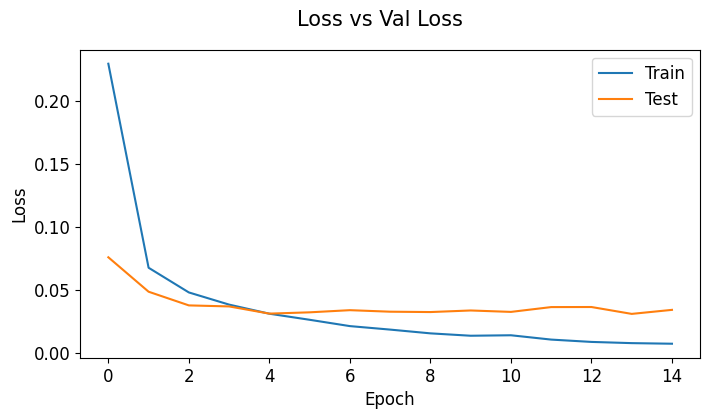

In [102]:
optimization_learning_curves(history_base, metrica='loss', title='Loss vs Val Loss')

- Se presenta un pequeño sobre ajuste después de la época 4, pero se evidencia que es posible que la curva de validación se reduzca después de la época 10

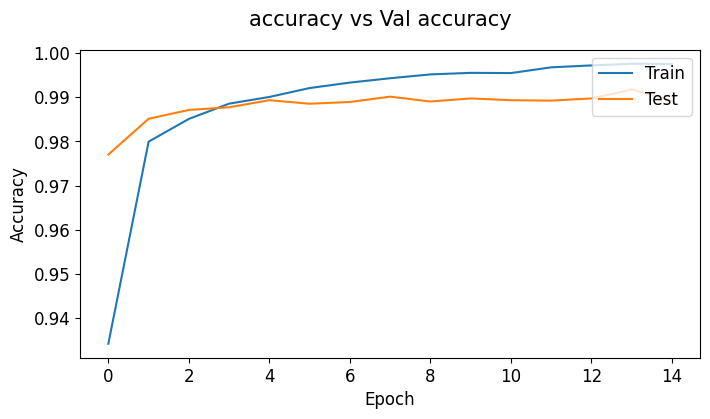

In [103]:
optimization_learning_curves(
    history_base,
    metrica='accuracy',
    title='accuracy vs Val accuracy',
    y_label = 'Accuracy')

El modelo no tiene un buen comportamiento al momento de predecir los datos de validación, con relación a los de entrenamiento, sin embargo, es un score muy alto.

In [104]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Performance: %.2f%%" % (100-score[1]*100))

Performance: 1.08%


In [105]:
print('Accuracy :',score[1])
print('Loss :',score[0])

Accuracy : 0.9891999959945679
Loss : 0.033954668790102005


# CNN más profunda

In [106]:
def model_deep():
  model = Sequential()
  model.add(Conv2D(30, (5,5), input_shape=(28,28,1), activation='relu'))
  model.add(MaxPooling2D())
  model.add(Conv2D(15, (2,2), activation='relu'))
  model.add(MaxPooling2D())
  model.add(Dropout(0.2))
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dense(50, activation='relu'))
  model.add(Dense(10, activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

In [107]:
X_train.shape[0]/200

300.0

300 lotes de 200 imagens

In [110]:
model = model_deep()
history_deep = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15, batch_size=200)

Epoch 1/15
300/300 [==============================] - 3s 6ms/step - loss: 0.4223 - accuracy: 0.8691 - val_loss: 0.0894 - val_accuracy: 0.9713
Epoch 2/15
300/300 [==============================] - 1s 5ms/step - loss: 0.1058 - accuracy: 0.9668 - val_loss: 0.0618 - val_accuracy: 0.9803
Epoch 3/15
300/300 [==============================] - 1s 5ms/step - loss: 0.0797 - accuracy: 0.9756 - val_loss: 0.0490 - val_accuracy: 0.9839
Epoch 4/15
300/300 [==============================] - 2s 7ms/step - loss: 0.0645 - accuracy: 0.9796 - val_loss: 0.0443 - val_accuracy: 0.9855
Epoch 5/15
300/300 [==============================] - 2s 5ms/step - loss: 0.0543 - accuracy: 0.9830 - val_loss: 0.0327 - val_accuracy: 0.9883
Epoch 6/15
300/300 [==============================] - 1s 5ms/step - loss: 0.0506 - accuracy: 0.9844 - val_loss: 0.0343 - val_accuracy: 0.9886
Epoch 7/15
300/300 [==============================] - 1s 5ms/step - loss: 0.0420 - accuracy: 0.9871 - val_loss: 0.0317 - val_accuracy: 0.9889
Epoch 

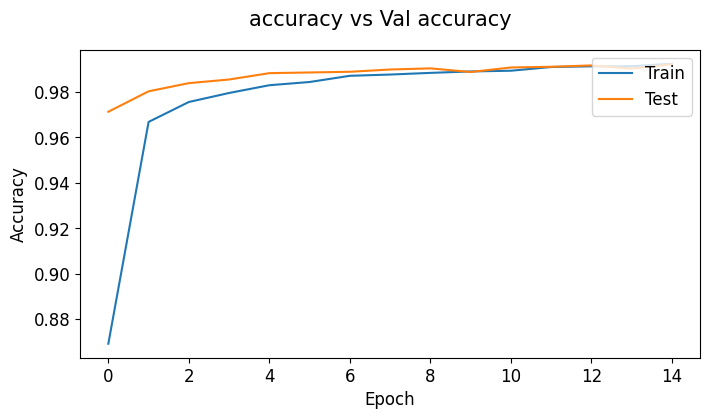

In [113]:
optimization_learning_curves(
    history_deep,
    metrica='accuracy',
    title='accuracy vs Val accuracy',
    y_label = 'Accuracy')

El modelo tiene una convergencia a partir de la epoca 12 en el rendimiento en la predicción de las imagenes, sin evidencia de Overfitting.

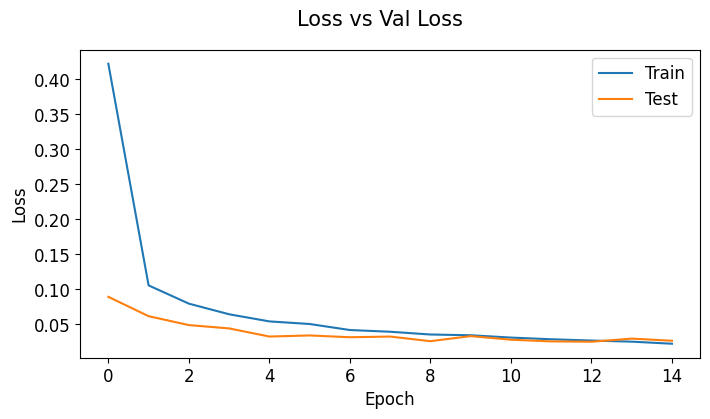

In [111]:
optimization_learning_curves(history_deep, metrica='loss', title='Loss vs Val Loss')

Converge en la 12 epoca

In [114]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Performance: %.2f%%" % (100-score[1]*100))

Performance: 0.78%


In [115]:
print('Accuracy :',score[1])
print('Loss :',score[0])

Accuracy : 0.9922000169754028
Loss : 0.026692664250731468


In [135]:
y_predict = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [140]:
labels = np.argmax(y_predict, axis=1)

In [142]:
predicciones_dp = pd.DataFrame(y_predict)*100
predicciones_dp['y_label'] = labels
predicciones_dp

,0,1,2,3,4,5,6,7,8,9,y_label
0,0.000000026263649,0.000010533149180,0.000012964276721,0.001231450005434,0.000008586992408,0.000000511697237,0.000000000000942,99.998580932617188,0.000005365009201,0.000147583516082,7
1,0.000005074103683,0.000063785737439,99.999893188476562,0.000000620635035,0.000000011406095,0.000000003559534,0.000038174970541,0.000000037894381,0.000001145592591,0.000000000061513,2
2,0.000037968435208,99.994895935058594,0.000043435979023,0.000000080626272,0.000604300177656,0.000082319704234,0.000053096038755,0.003037573769689,0.001078414381482,0.000158082839334,1
3,99.999000549316406,0.000000044876860,0.000059714056988,0.000001077621050,0.000010833280612,0.000083920807811,0.000817480147816,0.000009410215171,0.000013580256564,0.000006282702543,0
4,0.000000009738732,0.000000016259209,0.000000543209126,0.000000099454503,99.994400024414062,0.000000010585842,0.000000005611535,0.000026463876566,0.000058760066167,0.005524563603103,4
...,...,...,...,...,...,...,...,...,...,...,...
9995,0.000000028158267,0.000001160889610,99.999977111816406,0.000002426072797,0.000000000074368,0.000000000091258,0.000000000003093,0.000019179749870,0.000000164431029,0.000000002838467,2
9996,0.000000055360466,0.000008232786968,0.000001800796440,99.999916076660156,0.000000005086937,0.000038579106331,0.000000000083999,0.000002258842642,0.000000620386629,0.000033411670302,3
9997,0.000000000000021,0.000000003830133,0.000000000025284,0.000000000009805,100.000000000000000,0.000000000564476,0.000000000015272,0.000000525619726,0.000001082053927,0.000002055524874,4
9998,0.000000224624344,0.000000001686733,0.000000005591926,0.000032025887776,0.000000030133876,99.986137390136719,0.000183500727871,0.000000057633649,0.013641558587551,0.000000803769581,5


In [146]:
print(classification_report(
      y_true = np.argmax(y_test, axis=1),
      y_pred = np.argmax(y_predict, axis=1)
))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      0.99      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.98      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       1.00      0.98      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



El modelo con la arquitectura más profunda es excelente para identificar los números en el conjunto de validación.